In [1]:
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf

In [2]:
#Establishing the environment for Spark so that it can access the cluster.
spark=SparkSession.builder\
 .master("local[*]")\
 .appName("League of Legends Features at 10min Mark")\
 .getOrCreate()
sc=spark.sparkContext

In [3]:
# Data is brought in.
lol_data = spark.read.csv(r"C:\Users\LVada\Documents\Dissertation\lol_clean_data.csv", inferSchema = True, header = True)

In [4]:
# Observing the first six rows of the data frame
lol_data.head(6) 

[Row(blueWins=0, blueWardsPlaced=28, blueWardsDestroyed=2, blueFirstBlood=1, blueKills=9, blueDeaths=6, blueAssists=11, blueEliteMonsters=0, blueTowersDestroyed=0, blueTotalGold=17210, blueAvgLevel=6.6, blueTotalExperience=17039, blueTotalMinionsKilled=195, blueTotalJungleMinionsKilled=36, blueGoldDiff=643, blueExperienceDiff=-8, redWardsPlaced=15, redWardsDestroyed=6, redFirstBlood=0, redKills=6, redDeaths=9, redAssists=8, redEliteMonsters=0, redTowersDestroyed=0, redTotalGold=16567, redAvgLevel=6.8, redTotalExperience=17047, redTotalMinionsKilled=197, redTotalJungleMinionsKilled=55, redGoldDiff=-643, redExperienceDiff=8),
 Row(blueWins=0, blueWardsPlaced=12, blueWardsDestroyed=1, blueFirstBlood=0, blueKills=5, blueDeaths=5, blueAssists=5, blueEliteMonsters=0, blueTowersDestroyed=0, blueTotalGold=14712, blueAvgLevel=6.6, blueTotalExperience=16265, blueTotalMinionsKilled=174, blueTotalJungleMinionsKilled=43, blueGoldDiff=-2908, blueExperienceDiff=-1173, redWardsPlaced=12, redWardsDestr

In [5]:
# Observing the data frame itself.
lol_data.show() 

+--------+---------------+------------------+--------------+---------+----------+-----------+-----------------+-------------------+-------------+------------+-------------------+----------------------+----------------------------+------------+------------------+--------------+-----------------+-------------+--------+---------+----------+----------------+------------------+------------+-----------+------------------+---------------------+---------------------------+-----------+-----------------+
|blueWins|blueWardsPlaced|blueWardsDestroyed|blueFirstBlood|blueKills|blueDeaths|blueAssists|blueEliteMonsters|blueTowersDestroyed|blueTotalGold|blueAvgLevel|blueTotalExperience|blueTotalMinionsKilled|blueTotalJungleMinionsKilled|blueGoldDiff|blueExperienceDiff|redWardsPlaced|redWardsDestroyed|redFirstBlood|redKills|redDeaths|redAssists|redEliteMonsters|redTowersDestroyed|redTotalGold|redAvgLevel|redTotalExperience|redTotalMinionsKilled|redTotalJungleMinionsKilled|redGoldDiff|redExperienceDiff|


In [6]:
# Checking the target variable groups, the blue team has 4930 positive match outcomes and 4949 negative ones.
lol_data.groupBy("blueWins").count().show()

+--------+-----+
|blueWins|count|
+--------+-----+
|       1| 4930|
|       0| 4949|
+--------+-----+



In [7]:
# Number of data occurrences.
lol_data.count()

9879

In [8]:
# Number of data attributes.
len(lol_data.columns)

31

In [9]:
# Data frame structure.
lol_data.printSchema()

root
 |-- blueWins: integer (nullable = true)
 |-- blueWardsPlaced: integer (nullable = true)
 |-- blueWardsDestroyed: integer (nullable = true)
 |-- blueFirstBlood: integer (nullable = true)
 |-- blueKills: integer (nullable = true)
 |-- blueDeaths: integer (nullable = true)
 |-- blueAssists: integer (nullable = true)
 |-- blueEliteMonsters: integer (nullable = true)
 |-- blueTowersDestroyed: integer (nullable = true)
 |-- blueTotalGold: integer (nullable = true)
 |-- blueAvgLevel: double (nullable = true)
 |-- blueTotalExperience: integer (nullable = true)
 |-- blueTotalMinionsKilled: integer (nullable = true)
 |-- blueTotalJungleMinionsKilled: integer (nullable = true)
 |-- blueGoldDiff: integer (nullable = true)
 |-- blueExperienceDiff: integer (nullable = true)
 |-- redWardsPlaced: integer (nullable = true)
 |-- redWardsDestroyed: integer (nullable = true)
 |-- redFirstBlood: integer (nullable = true)
 |-- redKills: integer (nullable = true)
 |-- redDeaths: integer (nullable = tru

In [10]:
# Summary statistics
lol_data.describe().show()

+-------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+-------------------+------------------+------------------+-------------------+----------------------+----------------------------+------------------+------------------+------------------+-----------------+-------------------+------------------+-----------------+-----------------+------------------+-------------------+------------------+-----------------+------------------+---------------------+---------------------------+-------------------+------------------+
|summary|          blueWins|   blueWardsPlaced|blueWardsDestroyed|    blueFirstBlood|        blueKills|        blueDeaths|      blueAssists| blueEliteMonsters|blueTowersDestroyed|     blueTotalGold|      blueAvgLevel|blueTotalExperience|blueTotalMinionsKilled|blueTotalJungleMinionsKilled|      blueGoldDiff|blueExperienceDiff|    redWardsPlaced|redWardsDestroyed|      redFir

In [11]:
# Implementing feature transformer with a vector assembler library. It is part of MLlib, Spark's scalable ML library.
from pyspark.ml.feature import VectorAssembler

In [12]:
# Checking the variable names.
lol_data.columns

['blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'redWardsPlaced',
 'redWardsDestroyed',
 'redFirstBlood',
 'redKills',
 'redDeaths',
 'redAssists',
 'redEliteMonsters',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff']

In [13]:
# Using the class "VectorAssembler", calling all independent variables and adding them into an output vector column. The result is stored in the "lol_assembler" variable.
lol_assembler = VectorAssembler(inputCols = ['blueWardsPlaced','blueWardsDestroyed','blueFirstBlood','blueKills','blueDeaths','blueAssists','blueEliteMonsters','blueTowersDestroyed',
                                         'blueTotalGold','blueAvgLevel','blueTotalExperience','blueTotalMinionsKilled','blueTotalJungleMinionsKilled','blueGoldDiff','blueExperienceDiff',
                                         'redWardsPlaced','redWardsDestroyed','redFirstBlood','redKills','redDeaths','redAssists','redEliteMonsters','redTowersDestroyed',
                                         'redTotalGold','redAvgLevel','redTotalExperience','redTotalMinionsKilled','redTotalJungleMinionsKilled','redGoldDiff','redExperienceDiff'],
                            outputCol = "features")
lol_assembler

VectorAssembler_bc06e7b697c8

In [14]:
# Adding the features to the data frame.
lol_output = lol_assembler.transform(lol_data)
lol_output.show()

+--------+---------------+------------------+--------------+---------+----------+-----------+-----------------+-------------------+-------------+------------+-------------------+----------------------+----------------------------+------------+------------------+--------------+-----------------+-------------+--------+---------+----------+----------------+------------------+------------+-----------+------------------+---------------------+---------------------------+-----------+-----------------+--------------------+
|blueWins|blueWardsPlaced|blueWardsDestroyed|blueFirstBlood|blueKills|blueDeaths|blueAssists|blueEliteMonsters|blueTowersDestroyed|blueTotalGold|blueAvgLevel|blueTotalExperience|blueTotalMinionsKilled|blueTotalJungleMinionsKilled|blueGoldDiff|blueExperienceDiff|redWardsPlaced|redWardsDestroyed|redFirstBlood|redKills|redDeaths|redAssists|redEliteMonsters|redTowersDestroyed|redTotalGold|redAvgLevel|redTotalExperience|redTotalMinionsKilled|redTotalJungleMinionsKilled|redGoldDif

In [15]:
# Generating a new data frame which has the features and target variable "blueWins".
lol_trees_model = lol_output.select("features","blueWins")
lol_trees_model.show()

+--------------------+--------+
|            features|blueWins|
+--------------------+--------+
|[28.0,2.0,1.0,9.0...|       0|
|[12.0,1.0,0.0,5.0...|       0|
|[15.0,0.0,0.0,7.0...|       0|
|[43.0,1.0,0.0,4.0...|       0|
|[75.0,4.0,0.0,6.0...|       0|
|[18.0,0.0,0.0,5.0...|       1|
|[18.0,3.0,1.0,7.0...|       1|
|[16.0,2.0,0.0,5.0...|       0|
|[16.0,3.0,0.0,7.0...|       0|
|[13.0,1.0,1.0,4.0...|       1|
|[20.0,3.0,1.0,4.0...|       0|
|[33.0,2.0,1.0,11....|       0|
|[18.0,1.0,1.0,7.0...|       1|
|[14.0,3.0,0.0,4.0...|       0|
|[15.0,3.0,1.0,4.0...|       1|
|[17.0,1.0,0.0,3.0...|       0|
|[14.0,1.0,1.0,10....|       1|
|[43.0,3.0,0.0,3.0...|       0|
|[21.0,4.0,1.0,5.0...|       1|
|[11.0,3.0,0.0,5.0...|       0|
+--------------------+--------+
only showing top 20 rows



In [16]:
import pyspark.sql.functions as f

In [17]:
# Preparing data frame to fit the model. Training data has 70% and testing 30%.
train_lol_data, test_lol_data = lol_trees_model.randomSplit([0.7, 0.3])

In [18]:
# Training data check.
train_lol_data.count()

6963

In [19]:
#Testing data check.
test_lol_data.count()

2916

In [20]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [21]:
# Using DecisionTreeClassiefier class, fitting the training data onto the target variable "blueWins". Storing it into the "lol_data_classifier" object.
lol_data_classifier = DecisionTreeClassifier(labelCol = "blueWins").fit(train_lol_data)

In [22]:
# Generating predictions of the testing data and storing it into the "lol_data_predictions" variable.
lol_data_predictions = lol_data_classifier.transform(test_lol_data)

In [23]:
# Actual vs. predicted values.
lol_data_predictions.show()

+--------------------+--------+-------------+--------------------+----------+
|            features|blueWins|rawPrediction|         probability|prediction|
+--------------------+--------+-------------+--------------------+----------+
|[5.0,0.0,0.0,2.0,...|       0| [611.0,42.0]|[0.93568147013782...|       0.0|
|[5.0,1.0,0.0,4.0,...|       1|[846.0,238.0]|[0.78044280442804...|       0.0|
|[8.0,0.0,1.0,4.0,...|       1|[296.0,457.0]|[0.39309428950863...|       1.0|
|[8.0,3.0,0.0,2.0,...|       0|[338.0,132.0]|[0.71914893617021...|       0.0|
|[8.0,3.0,0.0,5.0,...|       0| [611.0,42.0]|[0.93568147013782...|       0.0|
|[9.0,1.0,0.0,4.0,...|       1|[846.0,238.0]|[0.78044280442804...|       0.0|
|[9.0,1.0,0.0,5.0,...|       0|[846.0,238.0]|[0.78044280442804...|       0.0|
|[9.0,1.0,1.0,6.0,...|       1|[164.0,738.0]|[0.18181818181818...|       1.0|
|[9.0,1.0,1.0,7.0,...|       1|[164.0,738.0]|[0.18181818181818...|       1.0|
|[9.0,2.0,0.0,3.0,...|       0| [611.0,42.0]|[0.93568147013782..

In [24]:
# Decision Trees model accuracy
lol_DT_accuracy = MulticlassClassificationEvaluator(labelCol="blueWins", metricName = "accuracy").evaluate(lol_data_predictions)
lol_DT_accuracy

0.72599451303155

In [25]:
# Decision Trees model precision
lol_DT_precision = MulticlassClassificationEvaluator(labelCol="blueWins", metricName = "weightedPrecision").evaluate(lol_data_predictions)
lol_DT_precision

0.7263822459785481

In [26]:
# Generating the prioritised features of the Decision Trees model.
lol_data_classifier.featureImportances

SparseVector(30, {6: 0.0028, 10: 0.0036, 13: 0.1262, 14: 0.0211, 16: 0.0021, 20: 0.0047, 21: 0.0175, 22: 0.0048, 25: 0.0044, 27: 0.0048, 28: 0.787, 29: 0.0209})

In [27]:
# Decision Trees model F1 score
lol_DT_F1Score = MulticlassClassificationEvaluator(labelCol="blueWins", metricName = "weightedFMeasure").evaluate(lol_data_predictions)
lol_DT_F1Score

0.7259483960271287

In [28]:
# Decision Trees model false positive rate
lol_DT_FPR = MulticlassClassificationEvaluator(labelCol="blueWins", metricName = "weightedFalsePositiveRate").evaluate(lol_data_predictions)
lol_DT_FPR

0.2737249132253782

In [29]:
# Decision Trees model true positive rate
lol_DT_TPR = MulticlassClassificationEvaluator(labelCol="blueWins", metricName = "weightedTruePositiveRate").evaluate(lol_data_predictions)
lol_DT_TPR

0.7259945130315502

In [30]:
# Decision Trees model sensitivity
lol_DT_Sens = MulticlassClassificationEvaluator(labelCol="blueWins", metricName = "weightedRecall").evaluate(lol_data_predictions)
lol_DT_Sens

0.7259945130315502

In [31]:
import matplotlib.pyplot as plt

In [32]:
# Decision Trees model area under the curve
lol_DT_auc = MulticlassClassificationEvaluator(labelCol="blueWins").evaluate(lol_data_predictions)
lol_DT_auc

0.7259483960271287

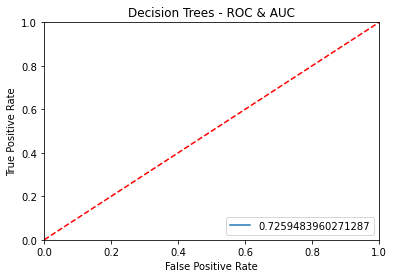

In [33]:
plt.title('Decision Trees - ROC & AUC')
plt.plot(lol_DT_FPR, lol_DT_TPR, label = lol_DT_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()